<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/manymodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work in this notebook still in progress

In this exercise I will use a few different techniques to build predictors for the wisconcin cancer database. These shall be: a decision tree, random forest, logistic regression and naive bayes

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,scale
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True) #load dataset
standardized_X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.2, random_state = 0) #20% of data kept for testing, frozen rng seed

targets = [0,1]
colors = ['b','r']

#Initial data exploration
The Wisconsin cancer data set concerns samples taken from breast mass of 569 individuals, and analyses the shape of cell nuclei to try to predict malignant breas masses. The features are the mean, standard error and worst of the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal dimension. All 30 variables are numeric variables. The classification is into malignant and benign. There is no missing data.



[0.98204467 0.01617649]
[0.44272026 0.18971182]


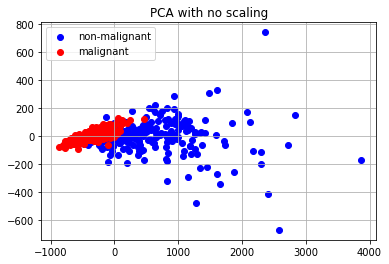

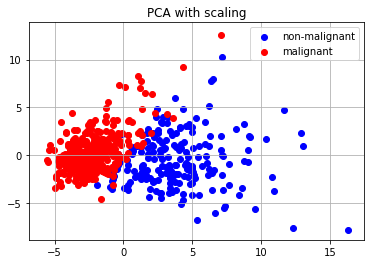

In [99]:
#Visualization of the impact of scaling data on its PCA decomposition into two dimension
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve
pca = PCA(n_components = 2) #2 component PCA
pca.fit(X)
print(pca.explained_variance_ratio_) #percentage of variance explained by each of the two components
pcaX = pca.transform(X)
plt.figure(0)
plt.title("PCA with no scaling")
for target, color in zip(targets, colors):
  results = np.where(y==target)
  plt.scatter(pcaX[results,0],pcaX[results,1],c = color)
plt.legend(["non-malignant","malignant"])
plt.grid()

#with scaling
pca = PCA(n_components = 2) #2 component PCA
pca.fit(standardized_X)
print(pca.explained_variance_ratio_) #percentage of variance explained by each of the two components
pcaX = pca.transform(standardized_X)
plt.figure(1)
plt.title("PCA with scaling")
for target, color in zip(targets, colors):
  results = np.where(y==target)
  plt.scatter(pcaX[results,0],pcaX[results,1],c = color)
plt.legend(["non-malignant","malignant"])
plt.grid()

score on standard data: 0.9035087719298246
score on PCA transformed data: 0.9210526315789473


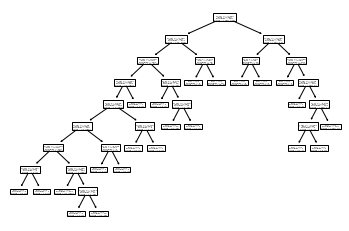

<Figure size 432x288 with 0 Axes>

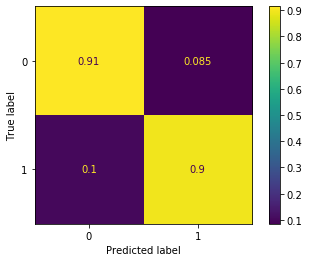

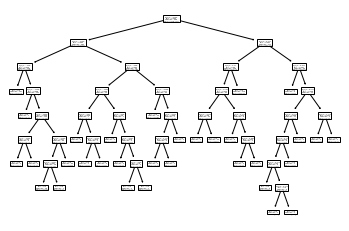

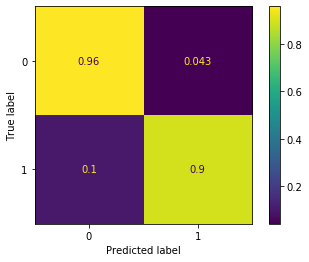

In [108]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(random_state=1) #unspecificed decision tree
model1 = model1.fit(X_train,y_train) #fitting the model
plt.figure(0)
tree.plot_tree(model1) #shape of the decision tree
print("score on standard data:",model1.score(X_test, y_test))
cm_model1 = confusion_matrix(y_test,model1.predict(X_test))
plt.figure(2)
plot_confusion_matrix(model1, X_test,y_test,normalize='true')

model1PCA = tree.DecisionTreeClassifier(random_state=1)
model1PCA = model1PCA.fit(pca.transform(X_train),y_train)
plt.figure(1)
tree.plot_tree(model1PCA)
print("score on PCA transformed data:",model1PCA.score(pca.transform(X_test), y_test))
plt.figure(3)
plot_confusion_matrix(model1PCA, pca.transform(X_test),y_test,normalize='true')


By playing with the random seed as well as the maximal depth of both trees, it is not immediately clear if one is much better than the other.

[0.06336509 0.01594278 0.05917918 0.04003853 0.00113031 0.00187117
 0.09966146 0.12048651 0.         0.         0.02302895 0.00120666
 0.00321454 0.03505558 0.00059257 0.00055799 0.00088353 0.
 0.         0.00151347 0.09982984 0.00389352 0.13713896 0.10787666
 0.00478493 0.01065812 0.02166493 0.13741289 0.00359746 0.0054144 ]


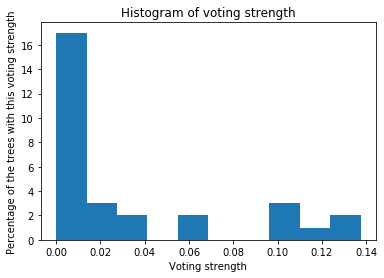

<Figure size 432x288 with 0 Axes>

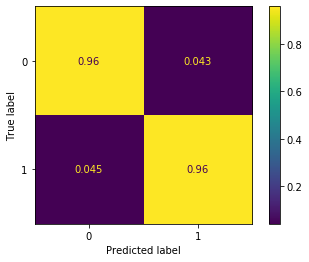

In [97]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=2, random_state = 1 ) #The maximum depth of each tree is to prevent a swarm of memory eating massive trees. RNG seed is frozen
model2.fit(X_train,y_train)

print(model2.feature_importances_) #relative voting strength of each tree
_ = plt.hist(model2.feature_importances_)
plt.title("Histogram of voting strength")
plt.xlabel("Voting strength")
plt.ylabel("Percentage of the trees with this voting strength")
plt.show()

model2.score(X_test,y_test)
plt.figure(1)
plot_confusion_matrix(model2, X_test,y_test,normalize='true')


The score on the validation data for the collection of 30 trees with a maximal depth for each tree of 2 is 95.6%

The score is: 0.9649122807017544


<Figure size 432x288 with 0 Axes>

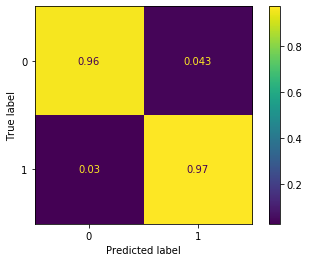

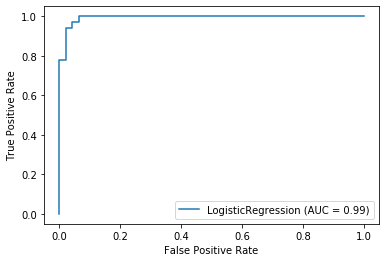

In [100]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(random_state=1,max_iter=500)
#initially failed to converge on non-preprocessed data using the standard 100 iterations; nor did it converge in full in 500 iterations
#upon reading, the likely culprit of this failure to converge is that using regularization (in this case, L2) makes the predictor scale dependant

model3.fit(X_train,y_train) #RNG seed is fixed as before. By default, sklearn uses the L2 penalty, and picks features at random while fitting the model
print("The score is:",model3.score(X_test,y_test))
plt.figure(1)
plot_confusion_matrix(model3, X_test,y_test,normalize='true')

plt.figure(2) #roc curve
plot_roc_curve(model3, X_test,y_test)


Discussion of logistic regression

The score is: 0.9035087719298246


<Figure size 432x288 with 0 Axes>

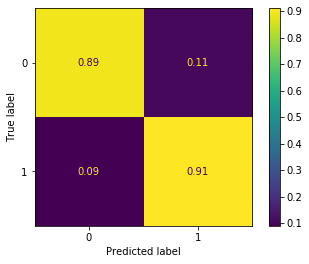

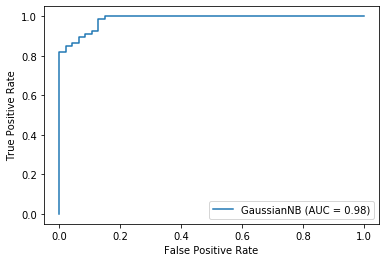

In [103]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB() #no prior for the moment
model4.fit(X_train, y_train)

print("The score is:",model4.score(X_test,y_test))
plt.figure(1)
plot_confusion_matrix(model4, X_test,y_test,normalize='true')

plt.figure(2) #roc curve
plot_roc_curve(model4, X_test,y_test)


TODO: Naive gaussian bayes assumes every variable is normally distributed. Perhaps other variant stronger? use PCA?


TODO: 

*   Overfitting test
*   Play around with variants of each model?
*   Training time?
*   Score on training data?
*   What feature comes up in most models? Can this feature be predicted through data analysis beforehand?
*   Performance graph of random forests for various maximal depth?


Question for the future:
* What is the impact of randomness on the performances of the decision tree vs PCA decision tree? What is the impact of the depth on the two decision trees? Is one better than the other? Are their performances randomly better or worse?
* Performance graph of random forests for various maximal depth?

